# Coursera Course Analysis

This notebook provides a detailed analysis of the Coursera course dataset. Including steps for data cleaning, exploratory data analysis (EDA), and further analysis to uncover insights about the courses offered on Coursera.

## Objectives
- Understand the dataset structure and content.
- Clean the dataset to prepare for analysis.
- Perform EDA to identify trends and patterns.
- Conduct further analysis.
- Draw meaningful conclusions from the analysis.

## Dataset Overview
Dataset Name: Coursera Dataset on [Kaggle](https://www.kaggle.com/datasets/elvinrustam/coursera-dataset)

The dataset contains information about various courses offered on Coursera, including course titles, ratings, levels, schedules, learning outcomes, skills gained, and more.

## Tools Used
- Python: For data manipulation and analysis.
- Pandas: For data processing.
- Matplotlib and Seaborn: For creating visualizations.

In [23]:
import pandas as pd

# Load the dataset
file_path = 'CourseraDataset-Clean.csv'
data = pd.read_csv(file_path)
data.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


## Data Preprocessing
### Cleaning
The dataset was checked for missing values and duplicates, revealing missing values in the Modules and Instructor columns, which were noted but not imputed due to their specific nature. No duplicate rows were found.

In [24]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Data type check
data_types = data.dtypes

missing_values, duplicate_rows, data_types

(Course Title                       0
 Rating                             0
 Level                              0
 Schedule                           0
 What you will learn                0
 Skill gain                         0
 Modules                           33
 Instructor                        88
 Offered By                         0
 Keyword                            0
 Course Url                         0
 Duration to complete (Approx.)     0
 Number of Review                   0
 dtype: int64,
 0,
 Course Title                       object
 Rating                            float64
 Level                              object
 Schedule                           object
 What you will learn                object
 Skill gain                         object
 Modules                            object
 Instructor                         object
 Offered By                         object
 Keyword                            object
 Course Url                         object
 Duration to c

### Transformation
Data types were appropriate and required no adjustments.

## Exploratory Data Analysis (EDA)
Let's perform some EDA to get a better understanding of the dataset. We'll look at the distribution of course ratings, the number of courses per level, and the distribution of courses across different keywords (categories).

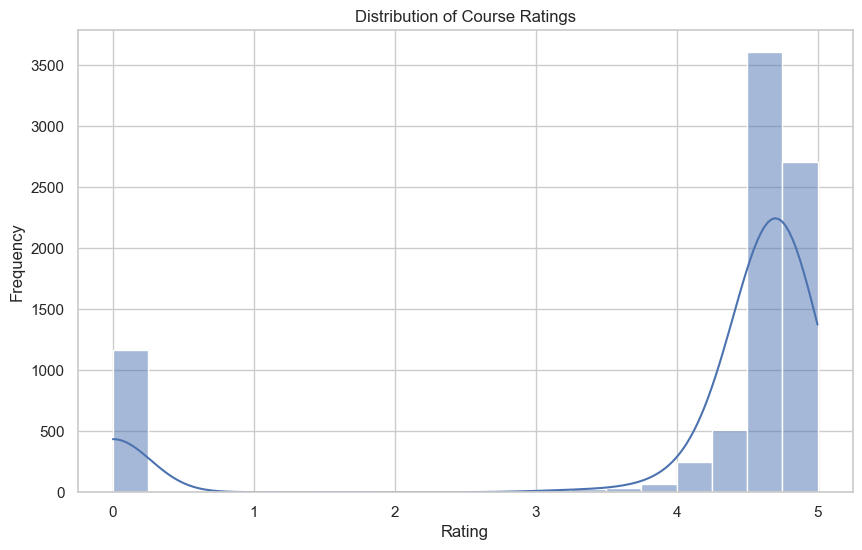

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Distribution of course ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows a left-skewed distribution, indicating that most courses have high ratings, with a peak around the 4.5 to 5.0 range. This suggests that the majority of courses are well-received by learners.

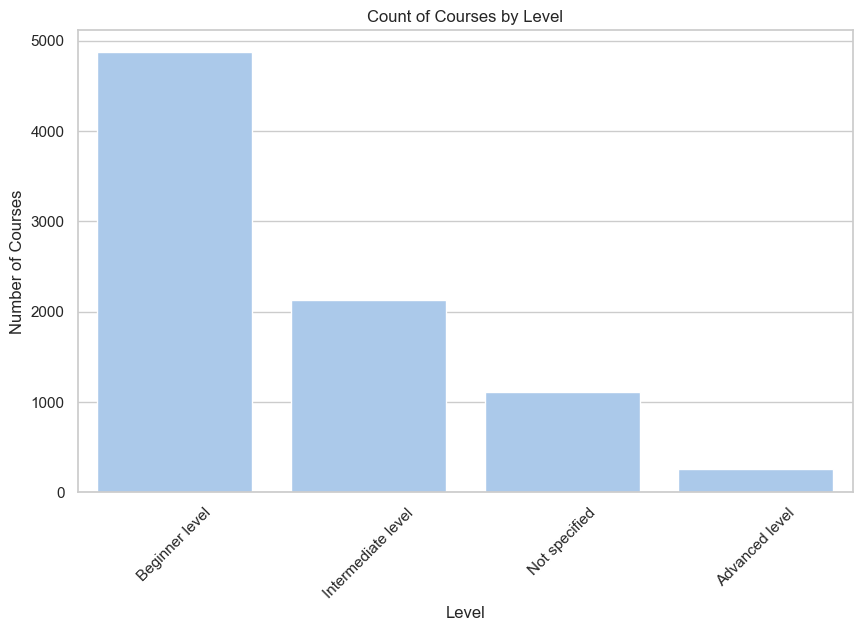

In [26]:
# 2. Count of courses by level
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Level')
plt.title('Count of Courses by Level')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

The majority of courses are targeted at the "Beginner level," followed by "Mixed level," "Intermediate level," and a few "Advanced level" courses. This distribution suggests that Coursera focuses on providing accessible education to a wide audience, with an emphasis on entry-level courses.

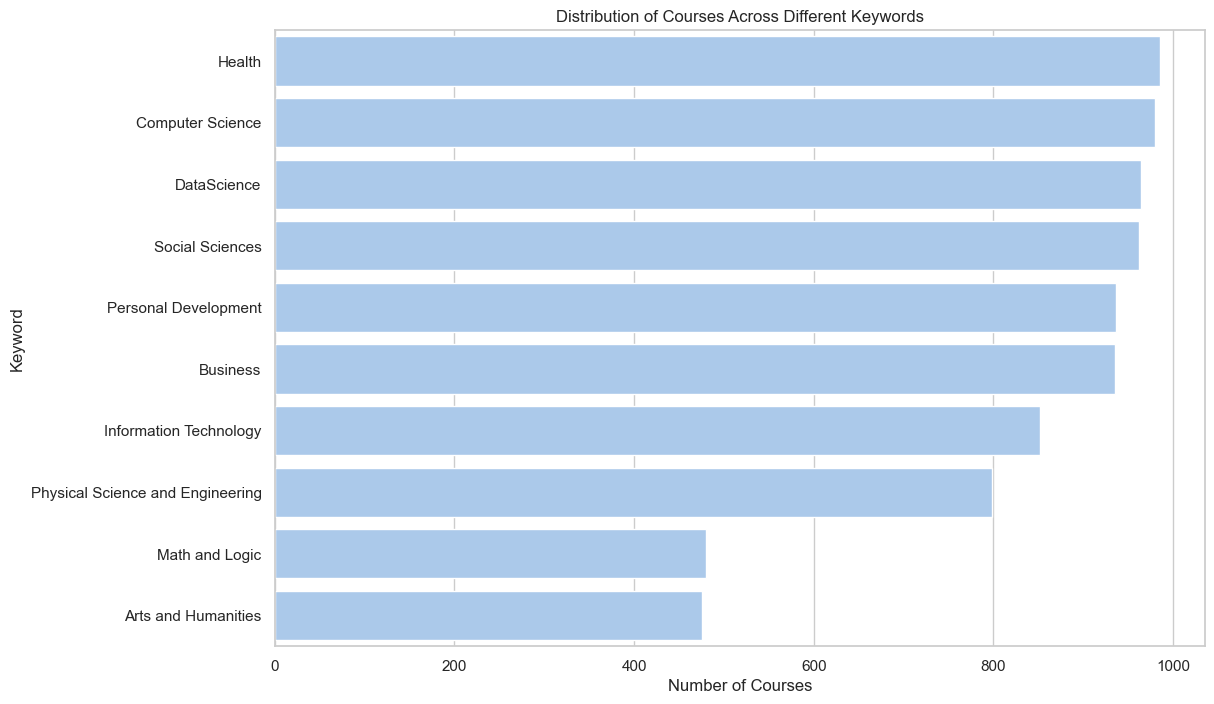

In [27]:
# 3. Distribution of courses across different keywords (categories)
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='Keyword', order = data['Keyword'].value_counts().index)
plt.title('Distribution of Courses Across Different Keywords')
plt.xlabel('Number of Courses')
plt.ylabel('Keyword')
plt.show()

The courses are spread across various categories, with some keywords having significantly more courses than others. This indicates the diversity of subjects available on Coursera, catering to a wide range of interests and educational needs.

## Further Analysis

### Relationship between course ratings and the number of reviews:
To understand if more popular courses (as indicated by the number of reviews) tend to have higher or lower ratings.

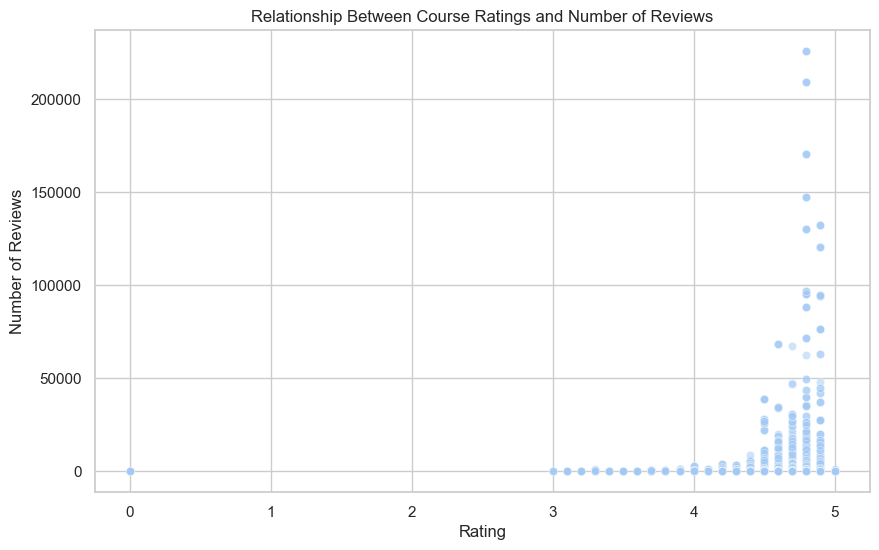

0.09105919146516471

In [28]:
# Relationship between course ratings and the number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Rating', y='Number of Review', alpha=0.5)
plt.title('Relationship Between Course Ratings and Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculating Pearson's correlation coefficient between ratings and number of reviews
rating_review_corr = data['Rating'].corr(data['Number of Review'])

rating_review_corr

The scatter plot does not indicate a strong relationship between course ratings and the number of reviews, suggesting that course popularity (as indicated by reviews) does not necessarily correlate with higher ratings. The Pearson's correlation coefficient supports this with a value of approximately 0.091, indicating a very weak positive correlation.

### Analysis of "Skill gain":
To identify the most common skills that courses aim to impart, which can give us insights into the current trends in skills development.

In [29]:
# Analysis of "Skill gain"
# Preprocessing the 'Skill gain' column to count occurrences of each skill
from collections import Counter

skills_series = data['Skill gain'].str.split(', ')
all_skills = [skill for sublist in skills_series.dropna() for skill in sublist]
skill_counts = Counter(all_skills)

# Identifying the most common skills
most_common_skills = skill_counts.most_common(10)

most_common_skills

[('Not specified', 2699),
 ('Data Analysis', 358),
 ('Python Programming', 357),
 ('Machine Learning', 237),
 ('Communication', 207),
 ('Data Visualization', 196),
 ('Data Science', 179),
 ('Leadership', 155),
 ('Cloud Computing', 154),
 ('SQL', 150)]

The most frequently mentioned skills in courses, excluding the 'Not specified' entries, include "Data Analysis," "Python Programming," "Machine Learning," "Communication," "Data Visualization," "Data Science," "Leadership," "Cloud Computing," and "SQL." This reflects a strong emphasis on technical skills, particularly in data science and programming, as well as soft skills like communication and leadership.

### Correlation between course length and ratings or number of reviews:
To see if there's a trend indicating that shorter or longer courses tend to be rated higher or have more reviews.

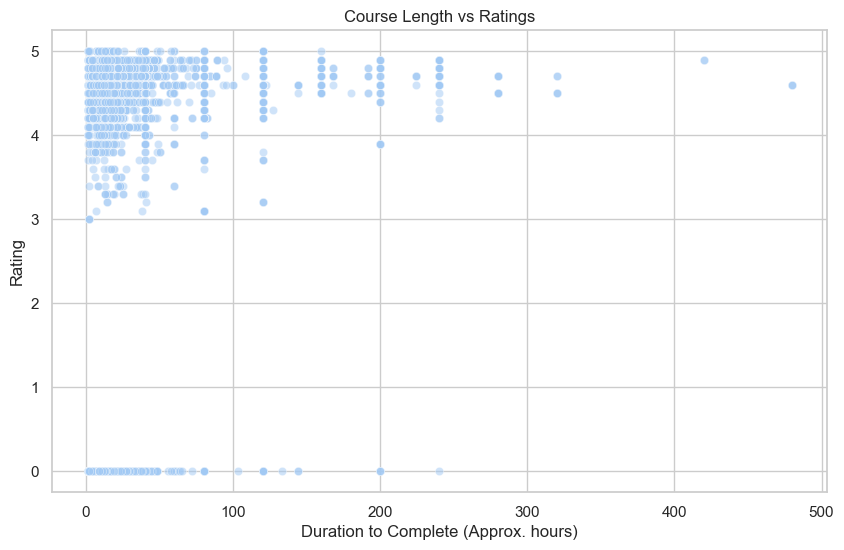

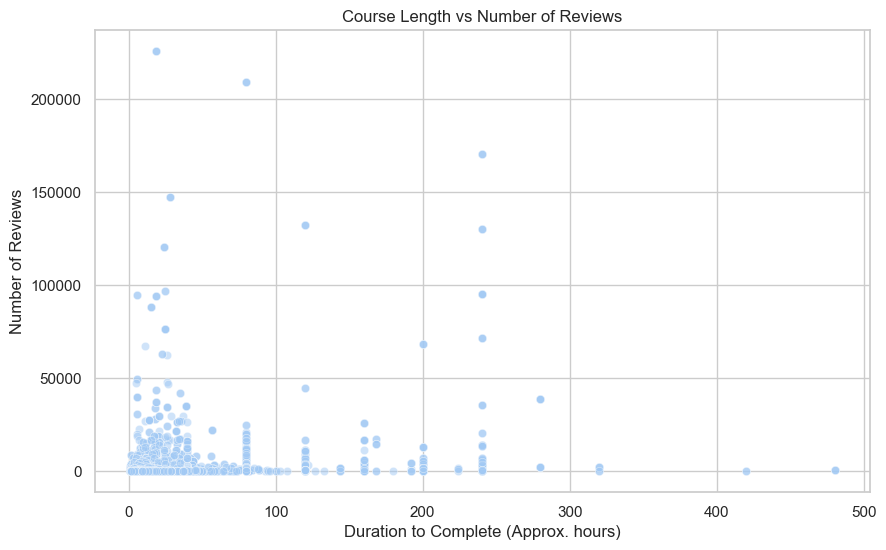

(0.13788699706265115, 0.17525274380668612)

In [30]:
# 3. Correlation between course length and ratings/number of reviews
# Scatter plot for course length vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration to complete (Approx.)', y='Rating', alpha=0.5)
plt.title('Course Length vs Ratings')
plt.xlabel('Duration to Complete (Approx. hours)')
plt.ylabel('Rating')
plt.show()

# Scatter plot for course length vs number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration to complete (Approx.)', y='Number of Review', alpha=0.5)
plt.title('Course Length vs Number of Reviews')
plt.xlabel('Duration to Complete (Approx. hours)')
plt.ylabel('Number of Reviews')
plt.show()

# Calculating Pearson's correlation coefficients
length_rating_corr = data['Duration to complete (Approx.)'].corr(data['Rating'])
length_reviews_corr = data['Duration to complete (Approx.)'].corr(data['Number of Review'])

length_rating_corr, length_reviews_corr

The scatter plots for course length versus ratings and number of reviews show a spread that doesn't indicate a strong relationship. However, Pearson's correlation coefficients are slightly positive (0.138 for course length vs. ratings and 0.175 for course length vs. number of reviews), suggesting a weak positive correlation. This might indicate that slightly longer courses have marginally higher ratings and a bit more reviews, but the correlation is not strong enough to draw definitive conclusions.

### Course Level and Learner Engagement:
 To see if a particular level attracts more learner engagement.

In [31]:
# Course Level and Learner Engagement
# Grouping the data by Level and calculating the average number of reviews
level_engagement = data.groupby('Level')['Number of Review'].mean().sort_values(ascending=False)

level_engagement

Level
Beginner level        2539.644837
Not specified         1519.600362
Intermediate level    1374.012670
Advanced level         500.454198
Name: Number of Review, dtype: float64

Beginner level courses have the highest engagement in terms of reviews, which could reflect broader accessibility or appeal of these courses to a wider audience, followed by courses whose levels are not specified, and then Intermediate level courses. Advanced level courses have the lowest average number of reviews, which might indicate a smaller audience or a higher barrier to entry for these courses.

## Conclusions

This analysis of the Coursera course dataset provided insights into course ratings, levels, and the variety of skills targeted. We observed that most courses are highly rated and cater primarily to beginner levels, emphasizing the accessibility of education on Coursera. Further analysis revealed weak correlations between course ratings, number of reviews, and course duration, suggesting that course quality is not solely dependent on popularity or length.

These findings can inform both learners and educators about prevailing trends in online education and help guide future course development and selection.